In [1]:
from sklearn.datasets import load_boston

In [3]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf

C:\Users\DELL\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import pandas as pd

In [4]:
train_df = load_boston()

In [5]:
#print(train_df.shape)
X_train = pd.DataFrame(train_df.data ,columns=train_df.feature_names)
Y_train = pd.DataFrame(data=np.array(train_df.target))
print(X_train.shape)
print(Y_train.head())

(506, 13)
      0
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2


In [9]:
def normalize_features(X):
    mu = np.mean(X,axis=0)
    sd = np.std(X,axis=0)
    X = (X-mu)/sd
    return X

In [28]:
def test_train_split(X,Y):
    r = np.random.rand(X.shape[0])> 0.8
    X_train = X[r]
    X_test = X[~r]
    Y_train = Y[r]
    Y_test = Y[~r]
    return X_train,X_test , Y_train , Y_test

In [29]:
X_train = normalize_features(X_train)
X_train , X_test , Y_train , Y_test = test_train_split(X_train,Y_train)
X = tf.placeholder(tf.float32,[None,X_train.shape[1]])
Y = tf.placeholder(tf.float32,[None,1])
W = tf.Variable(tf.ones([X_train.shape[1],1]))

In [30]:
print(X.shape)
print(W.shape)

(?, 13)
(13, 1)


In [31]:
init = tf.initialize_all_variables()

In [32]:
learning_rate = 0.01
yhat = tf.matmul(X,W)
cost = tf.reduce_mean(tf.square(yhat-Y))
training_step = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
sess = tf.Session()
sess.run(init)

In [33]:
cost_h = []
import time
a = time.clock()
for _ in range(1000):
    sess.run(training_step,feed_dict={X:X_train,Y:Y_train})
    cost_h.append(sess.run(cost,feed_dict={X:X_train,Y:Y_train}))
cost_h = np.array(cost_h)
print(time.clock()-a)

2.120641130063973


In [34]:
print(cost_h[:5])

[569.1216  559.3065  551.3191  544.77966 539.38983]


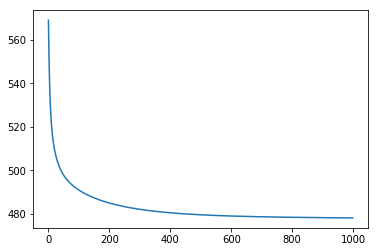

In [35]:
plt.plot(cost_h)
plt.show()

In [41]:
prediction = sess.run(yhat,feed_dict={X:X_test})

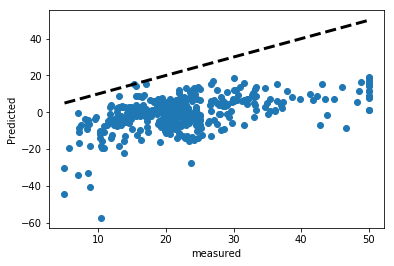

In [43]:
fig , ax = plt.subplots()
ax.scatter(Y_test,prediction)
ax.plot([Y_test.min(),Y_test.max()],[Y_test.min(),Y_test.max()],'k--',lw=3)
ax.set_xlabel('measured')
ax.set_ylabel('Predicted')
plt.show()

In [50]:
mse = tf.reduce_mean(tf.square(prediction-Y_test))

In [52]:
print(sess.run(mse))

620.3376212233069


In [53]:
sess.close()